#Data Understanding

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np

In [2]:
#1. Menghubungkan ke Drive Karena Dataset Berada Didrive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Penjelasan Dataset**


   








**Hubungan antar tabel:**
- `movieId` adalah kunci utama yang menghubungkan semua dataset ini.
- `ratings` dan `tags` berisi interaksi user terhadap film (`movieId`).
- `links` menghubungkan `movieId` ke ID film di database eksternal (IMDb, TMDb).
- `movies` adalah daftar utama film yang akan direkomendasikan.


**terdapat 4 dataset berbeda yang masing" memiliki 1 variabel yang saling terhubung yaitu `movieId`, karena dataset terlalu banyak hingga ratusan ribu dan memperlambat pemrosesan, kita hanya mengggunakan 10k baris pertama disetiap data**

**hasilnya :**
menunjukkan bahwa data yang tersedia di movie dan link tidak ada baris yang kosong, namun di ratings dan tags kemungkinan ada data yg kosong karena dari 10k data hanya sekitar 2-3k data saja yang terdeteksi.

In [3]:
#2. Load Dataset
movies = pd.read_csv('/content/drive/MyDrive/rekomendasi/movies.csv')
links = pd.read_csv('/content/drive/MyDrive/rekomendasi/links.csv')
ratings = pd.read_csv('/content/drive/MyDrive/rekomendasi/ratings.csv')
tags = pd.read_csv('/content/drive/MyDrive/rekomendasi/tags.csv')

#3. Mengambil Hanya 10000 Baris Data Pertama disetiap Variabel
movies1 = movies.head(10000)
links1 = links.head(10000)
ratings1 = ratings.head(10000)
tags1 = tags.head(10000)

#4. Menghitung Jumlah Data yang Diambil
print('Jumlah data movie yang tersedia: ', len(movies1.movieId.unique()))
print('Jumlah data links yang tersedia: ', len(links1.movieId.unique()))
print('Jumlah data ratings yang tersedia: ', len(ratings1.movieId.unique()))
print('Jumlah data tags yang tersedia: ', len(tags1.movieId.unique()))


Jumlah data movie yang tersedia:  10000
Jumlah data links yang tersedia:  10000
Jumlah data ratings yang tersedia:  3965
Jumlah data tags yang tersedia:  2182


#Univariate Exploratory Data Analysis


1. **movies.csv**
   - Berisi daftar film.
   - Kolom:
     - `movieId`: ID unik untuk setiap film.
     - `title`: Judul film.
     - `genres`: Genre dari film tersebut.
     
hasil pengecekan bahwa tidak ada missing values didalamnya, namun genres menunjukkan hanya sekitar 780 data unik, yang artinya ada judul film yang memiliki genre yang sama didalam dataset

In [4]:
# mengecek informasi pada dataset movies
movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10000 non-null  int64 
 1   title    10000 non-null  object
 2   genres   10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [5]:
print('Banyak jenis genre: ', len(movies1.genres.unique()))
print('Jenis genre yang tersedia: ', movies1.genres.unique())

Banyak jenis genre:  780
Jenis genre yang tersedia:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Adventure|Romance|IMAX' 'Documentary|IMAX'
 'Children|Comedy' 'Drama|War' 'Action|Crime|Drama'
 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller' 'Mystery|Thriller'
 'Animation|Children|Drama|Musical|Romance' 'Crime|Mystery|Thriller'
 'Action|Drama|Thriller' 'Adventure|Drama'
 'Adventure|Children|Comedy|Fantasy' 'Drama|Mystery' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'


2. **links.csv**
   - Berisi tautan (link) dari `movieId` ke ID film di situs lain (IMDb, TMDb).
   - Kolom:
     - `movieId`: ID film (sama dengan di movies.csv).
     - `imdbId`: ID film di IMDb.
     - `tmdbId`: ID film di TMDb.

`movieId` dan `imdbId` menunjukkan data yg unik sebanyak 10k data, artinya tidak ada yg duplikat, dan di `tmdbId` terdapat nilai missing values sebanyak 26 data

In [6]:
# mengecek informasi dataset links
links1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  10000 non-null  int64  
 1   imdbId   10000 non-null  int64  
 2   tmdbId   9974 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 234.5 KB


In [7]:
print('Banyak movieId unik di links: ', len(links1.movieId.unique()))
print('Banyak imdbId unik: ', len(links1.imdbId.unique()))
print('Banyak tmdbId unik: ', len(links1.tmdbId.unique()))

Banyak movieId unik di links:  10000
Banyak imdbId unik:  10000
Banyak tmdbId unik:  9975


3. **ratings.csv**
   - Berisi data rating yang diberikan user terhadap film.
   - Kolom:
     - `userId`: ID pengguna.
     - `movieId`: ID film yang dirating.
     - `rating`: Nilai rating (skala biasanya 0.5 - 5.0).
     - `timestamp`: Waktu rating diberikan.

dari data tidak terdapat missing values, banyak rating yang diberikan ada 10, yaitu yang berkisar dari 1-5

In [8]:
# mengecek informasi dataset ratings
ratings1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     10000 non-null  int64  
 1   movieId    10000 non-null  int64  
 2   rating     10000 non-null  float64
 3   timestamp  10000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


In [9]:
print('Banyak jenis rating yang diberikan: ', len(ratings1.rating.unique()))
print('Jenis rating yang tersedia: ', ratings1.rating.unique())

Banyak jenis rating yang diberikan:  10
Jenis rating yang tersedia:  [4.  1.  2.  5.  3.  3.5 0.5 4.5 2.5 1.5]


In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,3.200020e+07,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00,1.275241e+09
std,5.794905e+04,5.095816e+04,1.058986e+00,2.561630e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,5.005300e+04,1.233000e+03,3.000000e+00,1.051012e+09
50%,1.002970e+05,3.452000e+03,3.500000e+00,1.272622e+09
75%,1.504510e+05,4.419900e+04,4.000000e+00,1.503158e+09
max,2.009480e+05,2.927570e+05,5.000000e+00,1.697164e+09


4. **tags.csv**
   - Berisi tag/kata kunci yang diberikan user ke film.
   - Kolom:
     - `userId`: ID pengguna.
     - `movieId`: ID film yang diberi tag.
     - `tag`: Kata kunci/tag.
     - `timestamp`: Waktu tag diberikan.

tidak terdapat missing values, namunbanyak tipe tag hanya 2880, artinya ada movieId yang memiliki tag yg sama

In [11]:
tags1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     10000 non-null  int64 
 1   movieId    10000 non-null  int64 
 2   tag        10000 non-null  object
 3   timestamp  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [12]:
print('Banyak tipe tag: ', len(tags1.tag.unique()))
print('Tipe tag yang tersedia: ', tags1.tag.unique())

Banyak tipe tag:  2880
Tipe tag yang tersedia:  ['Kevin Kline' 'misogyny' 'acrophobia' ... 'double agents' 'Islamophobia'
 'US President']


**Kesimpulan Pemeriksaan**

- Dataset memiliki **66 pengguna** yang memberikan rating pada **10000 film**.
- Terdapat total **10000 data rating** yang menunjukkan interaksi antara pengguna dan film.

In [13]:
print('Jumlah userId: ', len(ratings1.userId.unique()))
print('Jumlah movieId: ', len(movies1.movieId.unique()))
print('Jumlah data rating: ', len(ratings1))

Jumlah userId:  66
Jumlah movieId:  10000
Jumlah data rating:  10000


# Data Preprocessing

**setelah semua file digabung, kita memiliki 11959 Movie yang unik.**


In [14]:
#1. Menggabungkan seluruh movieId pada kategori Movie
movie_all = np.concatenate((
    movies1.movieId.unique(),
    links1.movieId.unique(),
    ratings1.movieId.unique(),
    tags1.movieId.unique()
))

#2 Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))

print('Jumlah seluruh data movie berdasarkan movieId: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieId:  11959


Kita memiliki 206 data pengguna dari 11959 movie yang memiliki rating.
Jadi, kesimpulannya:

Banyak pengguna aktif yang memberi rating pada beragam film.

Meskipun ada banyak film, tidak semua film mendapat perhatian dari setiap pengguna, mengingat ada kemungkinan rating yang sparse (misalnya, beberapa film hanya dirating oleh sedikit pengguna).

In [15]:
#3. Menggabungkan seluruh userId
user_all = np.concatenate((
    ratings1.userId.unique(),
    tags1.userId.unique()
))

#4 Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  206


Disini kita coba menggabungkan seluruh record pada data, namun hanya berdasarkan movieId, sehingga hasil dari penggabunan akan menghasilkan setiap record pada dataset kecuali `movieId`, dan terlihat pada table banyak sekali yang berisi `NaN` artinya ada missing values didalamnya

In [16]:
#5. Merge data berdasarkan movieId
movie_info = pd.merge(movies1, links1, on='movieId', how='left')
movie_info = pd.merge(movie_info, tags1, on='movieId', how='left')
movies = pd.merge(ratings1, movie_info, on='movieId', how='left')

#6. Hapus kolom duplikat userId_y dan timestamp_y
movies = movies.drop(columns=['userId_y', 'timestamp_y'])

#7. Rename kolom supaya lebih rapi
movies = movies.rename(columns={'userId_x': 'userId', 'timestamp_x': 'timestamp'})

#8. (Opsional) Simpan hasilnya
movies.to_csv('/content/drive/MyDrive/rekomendasi/movies_merged_fix.csv', index=False)

#9. Tampilkan hasil akhirnya
movies


,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,tag
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance,114388.0,4584.0,NaN
1,1,25,1.0,944250228,Leaving Las Vegas (1995),Drama|Romance,113627.0,451.0,NaN
2,1,29,2.0,943230976,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,112682.0,902.0,NaN
3,1,30,5.0,944249077,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama,115012.0,37557.0,NaN
4,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746.0,63.0,atmospheric
...,...,...,...,...,...,...,...,...,...
46568,66,58559,4.0,1449462234,NaN,NaN,NaN,NaN,NaN
46569,66,59315,4.0,1449462462,NaN,NaN,NaN,NaN,NaN
46570,66,59725,4.0,1449463282,NaN,NaN,NaN,NaN,NaN
46571,66,59784,4.0,1449462794,NaN,NaN,NaN,NaN,NaN


banyak sekali yang memiliki missing values yaitu `title`, `genres`, `imdbId`, `tmdbId` dan `tag`

In [17]:
# 10. cek banyak data yang missing values
movies.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,2221
genres,2221
imdbId,2221
tmdbId,2222
tag,6637


kita hanya memilih variabel yang kita akan gunakan nantinya dan terlihat masih ada missing values yang kita atasi nanti

In [18]:
#11. mengambil variabel UserId, movieId, rating dan timestamp pada dataframe movies dan disimpan di variabel all_movie_rate
all_movie_rate = movies[['userId', 'movieId', 'rating', 'timestamp']]

#12. Menggabungkan all movie_rate dengan dataframe movies berdasarkan movieId
all_movie = pd.merge(all_movie_rate, movies[['movieId','title','genres']], on='movieId', how='left')

# Print dataframe all_movie_name
all_movie


,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
2,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
3,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
4,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
...,...,...,...,...,...,...
29362774,66,60069,3.0,1449462312,NaN,NaN
29362775,66,60069,3.0,1449462312,NaN,NaN
29362776,66,60069,3.0,1449462312,NaN,NaN
29362777,66,60069,3.0,1449462312,NaN,NaN


# Data Preparation

terdapat missing values pada variabel `title` dan `genres` sebanyak 7843

In [19]:
#1. Mengecek missing value pada dataframe all_movie
all_movie.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,7843
genres,7843


kita akan menghapus missing values tersebut, sehingga datanya bersih sekarang

In [20]:
#2. Membersihkan missing value dengan fungsi dropna()
all_movie_clean = all_movie.dropna()
all_movie_clean

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
2,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
3,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
4,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
...,...,...,...,...,...,...
29362631,66,31658,4.5,1449462757,Howl's Moving Castle (Hauru no ugoku shiro) (2...,Adventure|Animation|Fantasy|Romance
29362632,66,31658,4.5,1449462757,Howl's Moving Castle (Hauru no ugoku shiro) (2...,Adventure|Animation|Fantasy|Romance
29362633,66,31658,4.5,1449462757,Howl's Moving Castle (Hauru no ugoku shiro) (2...,Adventure|Animation|Fantasy|Romance
29362634,66,32031,2.0,1449463117,Robots (2005),Adventure|Animation|Children|Comedy|Fantasy|Sc...


disini kita akan mengurutkan data berdasrkan `movieId` secara ascending

In [21]:
#3. Menyamakan Jenis Genre
# Mengurutkan movie berdasarkan movieId kemudian memasukkannya ke dalam variabel fix_movie
fix_movie = all_movie_clean.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres
26669797,62,1,5.0,916455356,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
26669783,62,1,5.0,916455356,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
26669784,62,1,5.0,916455356,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
26669785,62,1,5.0,916455356,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
26669786,62,1,5.0,916455356,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
12364071,28,33679,4.0,1118685959,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance
12364072,28,33679,4.0,1118685959,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance
12364073,28,33679,4.0,1118685959,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance
12364074,28,33679,4.0,1118685959,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance


disini kita akan mengecek jumlah `movieId` yang unik dan hanya terdapat 2796 data, berarti banyak duplikat data di `movieId`

In [22]:
#4. Mengecek berapa jumlah fix_movie
len(fix_movie.movieId.unique())

2796

hasil pengecekkan menunjukkan jenis genres yang ada pada variabel fix_movie

In [23]:
#5. Mengecek kategori movie yang unik
fix_movie.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action|Adventure|Thriller',
       'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Fantasy', 'Comedy|Drama|Thriller',
       'Mystery|Thriller', 'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Children|Comedy',
       'Action|Sci-Fi|Thriller', 'Action|Comedy|Horror|Thriller',
       'Action', 'Comedy|Drama', 'Drama|War',
       'Action|Crime|Drama|Thriller', 'Drama|Thriller',
       'Crime|Drama|Romance', 'Action|Adventur

disini kita akan menyalin variabel fix_movie kedalam variabel preparation dan mengurutkannya secara ascending berdasarkan `movieId`

In [24]:
#6. Membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres
5628773,17,1,4.0,1027305751,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5628813,17,1,4.0,1027305751,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5628797,17,1,4.0,1027305751,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5628811,17,1,4.0,1027305751,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5628810,17,1,4.0,1027305751,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
5627813,16,33679,3.0,1517020694,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance
12364071,28,33679,4.0,1118685959,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance
12364073,28,33679,4.0,1118685959,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance
12364072,28,33679,4.0,1118685959,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance


disini kita akan menghapus data duplikat berdasarkan `movieId`, sehingga datanya sekarang sudah bersih

In [25]:
#7. Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres
26669797,62,1,5.0,916455356,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
11091473,28,2,3.0,961594981,Jumanji (1995),Adventure|Children|Fantasy
11091482,28,3,4.0,961439278,Grumpier Old Men (1995),Comedy|Romance
12365716,29,4,2.0,845056440,Waiting to Exhale (1995),Comedy|Drama|Romance
4391511,11,5,3.0,850085116,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...
29277135,65,33660,3.5,1173138820,Cinderella Man (2005),Drama|Romance
12364069,28,33672,4.0,1128976850,Lords of Dogtown (2005),Action|Comedy|Drama
12364070,28,33677,3.5,1130096668,Rock School (2005),Documentary
4387910,10,33679,2.0,1169298469,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance


dari sini kita melihat bahwa rating 3 dan 4 cenderung lebih banyak dalam dataset

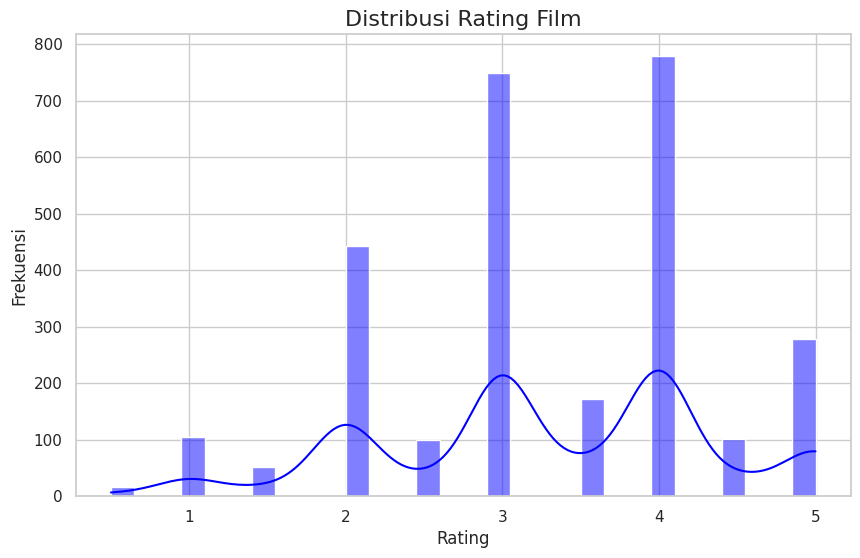

In [27]:
# Set tema visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Distribusi Rating Film
plt.figure(figsize=(10, 6))
sns.histplot(preparation['rating'], kde=True, color='blue', bins=30)
plt.title('Distribusi Rating Film', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()


disini kita melihat rata" rating setiap genre berada diatas 3

<ipython-input-30-23f0d7bea8e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preparation['genre_list'] = preparation['genres'].str.split('|')


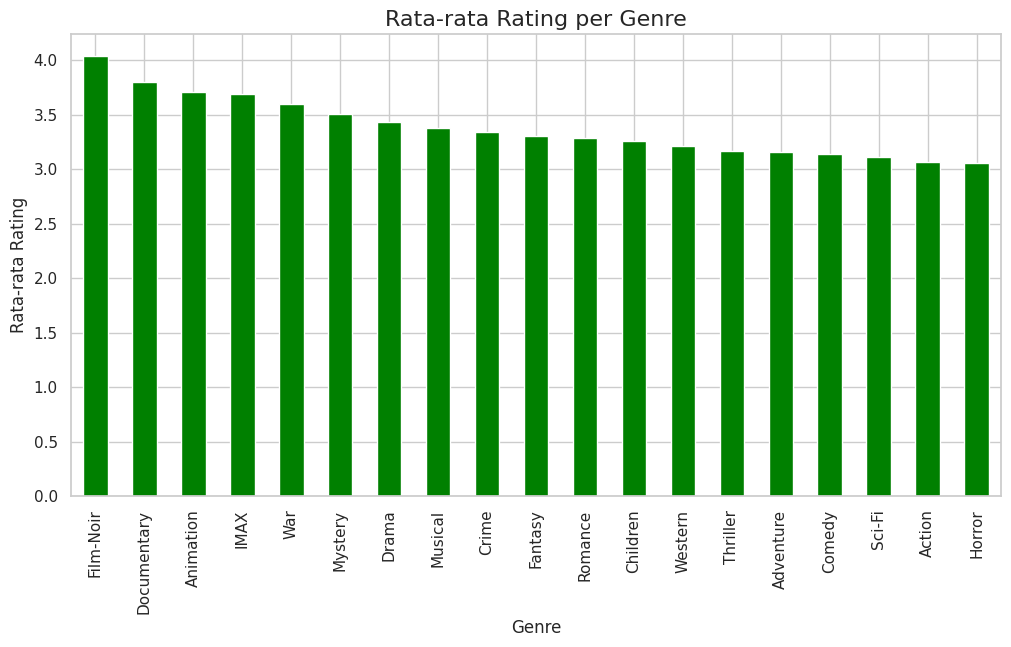

In [30]:
# Rata-rata Rating per Genre
# Pertama, kita pecah genre menjadi list
preparation['genre_list'] = preparation['genres'].str.split('|')

# Membuat dataframe baru yang berisi rata-rata rating per genre
genre_ratings = preparation.explode('genre_list').groupby('genre_list')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_ratings.plot(kind='bar', color='green')
plt.title('Rata-rata Rating per Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rata-rata Rating', fontsize=12)
plt.xticks(rotation=90)
plt.show()

disini kita akan membuat `movieId`, `title`, dan `genres` kedalam bentuk list, dan hanya terdapat hanya 2796 data setelah dibersihkan

In [32]:
#8. Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

#9. Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_title = preparation['title'].tolist()

#10. Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genres = preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_title))
print(len(movie_genres))

2796
2796
2796


kita buat list tersebut kedalam dictionary

In [33]:
# Membuat dictionary untuk data ‘movie_id’, ‘movie_title’, dan ‘genres’
movie_new = pd.DataFrame({
    'id': movie_id,
    'title': movie_title,
    'genres': movie_genres
})
movie_new

,id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
2791,33660,Cinderella Man (2005),Drama|Romance
2792,33672,Lords of Dogtown (2005),Action|Comedy|Drama
2793,33677,Rock School (2005),Documentary
2794,33679,Mr. & Mrs. Smith (2005),Action|Adventure|Comedy|Romance


# Model Development dengan Content Based Filtering

kita copy variabel movie_new kedalam variabel data untuk dibangun model berdasarkan content based filtering

In [34]:
data = movie_new
data.sample(5)

,id,title,genres
837,1730,Kundun (1997),Drama
2111,5255,Sorority Boys (2002),Comedy
634,1259,Stand by Me (1986),Adventure|Drama
1957,4714,Any Which Way You Can (1980),Comedy
197,333,Tommy Boy (1995),Comedy


disini kita akan melakukan vektorisasi pada kolom genres sehingga kita dapat pisahkan dengan array, karena setiap movie memiliki jenis genres lebih dari 1

In [35]:
#TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genres
tf.fit(data['genres'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'horror', 'imax',
       'musical', 'mystery', 'noir', 'romance', 'sci', 'thriller', 'war',
       'western'], dtype=object)

kita transformasikan vektor diatas kedalam bentuk matriks, dan menunjukkan ada 2796 data dengan 21 genres

In [36]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genres'])

# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(2796, 21)

In [37]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.38867264, 0.5590414 , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49323335, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.50848844, 0.57270924, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

kita akan buat dataframe hasil tf-idf matrix, disini terlihat genres drama yaitu French LieuPushing Tin (1999) memiliki 1.0 dan seterusnya.
ini adalah bentuk korelasi antar title dan genres

In [38]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis genres
# Baris diisi dengan title movie

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data.title
).sample(21, axis=1).sample(10, axis=0)

,romance,musical,children,animation,imax,drama,comedy,noir,horror,thriller,...,adventure,crime,film,fantasy,western,war,documentary,action,fi,sci
title,,,,,,,,,,,,,,,,,,,,,
Infernal Affairs (Mou gaan dou) (2002),0.000000,0.0,0.000000,0.0,0.0,0.401365,0.000000,0.000000,0.0,0.593026,...,0.000000,0.698016,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
"Cannonball Run, The (1981)",0.000000,0.0,0.000000,0.0,0.0,0.000000,0.598641,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.801018,0.000000,0.000000
Superman IV: The Quest for Peace (1987),0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.475161,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.421879,0.546004,0.546004
Romy and Michele's High School Reunion (1997),0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
DiG! (2004),0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000
Return to Oz (1985),0.000000,0.0,0.627538,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.493233,0.000000,0.000000,0.602426,0.000000,0.0,0.0,0.000000,0.000000,0.000000
Lost Highway (1997),0.253917,0.0,0.000000,0.0,0.0,0.164943,0.000000,0.536916,0.0,0.000000,...,0.000000,0.286853,0.536916,0.342435,0.000000,0.0,0.0,0.000000,0.000000,0.000000
For a Few Dollars More (Per qualche dollaro in più) (1965),0.000000,0.0,0.000000,0.0,0.0,0.271330,0.000000,0.000000,0.0,0.400896,...,0.000000,0.000000,0.000000,0.000000,0.773294,0.0,0.0,0.409485,0.000000,0.000000
Raging Bull (1980),0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


Sekarang, kita akan menghitung derajat kesamaan (similarity degree) antar movie dengan teknik cosine similarity. Di sini, kita menggunakan fungsi cosine_similarity dari library sklearn.

In [39]:
#Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.78800965, 0.1524235 , ..., 0.        , 0.32060408,
        0.10216714],
       [0.78800965, 1.        , 0.        , ..., 0.        , 0.2824793 ,
        0.        ],
       [0.1524235 , 0.        , 1.        , ..., 0.        , 0.64299583,
        0.23412796],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32060408, 0.2824793 , 0.64299583, ..., 0.        , 1.        ,
        0.1505433 ],
       [0.10216714, 0.        , 0.23412796, ..., 0.        , 0.1505433 ,
        1.        ]])

Dengan cosine similarity, kita berhasil mengidentifikasi kesamaan antara satu movie dengan movie lainnya. Shape (2796, 2796) merupakan ukuran matriks similarity dari data yang kita miliki. Berdasarkan data yang ada, matriks di atas sebenarnya berukuran 2796 restoran x 2796 movie (masing-masing dalam sumbu X dan Y). Artinya, kita mengidentifikasi tingkat kesamaan pada 2796 title movie. Tapi tentu kita tidak bisa menampilkan semuanya. Oleh karena itu, kita hanya memilih 10 restoran pada baris vertikal dan 5 restoran pada sumbu horizontal seperti pada contoh di bawah. <br>

seperti pada output Legally Blonde (2001) dan Girl Next Door, The (2004) memiliki kesamaan dengan Milk Money (1994), Where the Day Takes You (1992) dan Doors, The (1991) memiliki kesamaan dengan Nell (1994) dan seterusnya

In [40]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama resto
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title'], columns=data['title'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (2796, 2796)


title,Crumb (1994),Stranger Than Paradise (1984),Mary Shelley's Frankenstein (Frankenstein) (1994),Milk Money (1994),Nell (1994)
title,,,,,
Where the Day Takes You (1992),0.0,0.663413,0.275614,0.000000,1.000000
Death Becomes Her (1992),0.0,0.357198,0.000000,0.282135,0.000000
"Girl Next Door, The (2004)",0.0,0.442227,0.000000,1.000000,0.000000
Boat Trip (2003),0.0,0.748253,0.000000,0.591013,0.000000
"Doors, The (1991)",0.0,0.663413,0.275614,0.000000,1.000000
Legally Blonde (2001),0.0,0.442227,0.000000,1.000000,0.000000
"Lizzie McGuire Movie, The (2003)",0.0,0.292604,0.000000,0.661660,0.000000
A.I. Artificial Intelligence (2001),0.0,0.195466,0.700811,0.000000,0.294637
"Ladykillers, The (1955)",0.0,0.407146,0.000000,0.321587,0.000000


disini kita membuat fungsi untuk mendapatkan top 5 rekemondasi berdasarkan kesamaan genres

In [41]:
#Mendapatkan Rekomendasi
def movie_recommendations(title, similarity_data=cosine_sim_df, items=data[['title', 'genres']], k=5):
    """
    Rekomendasi Movie berdasarkan kemiripan dataframe

    Parameter:
    ---
    title : tipe data string (str)
                title movie (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan movie sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---


    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop title agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

disini kita akan cek title movie Jumanji (1995) dalam data, dan terdeteksi bahwa movie itu bergenre Adventure|Children|Fantasy

In [42]:
data[data.title.eq('Jumanji (1995)')]

,id,title,genres
1,2,Jumanji (1995),Adventure|Children|Fantasy


kemudian kita akan mengambil 5 rekomendasi film yg sama dengan genres yg sama

In [43]:
# Mendapatkan rekomendasi movie yang mirip dengan Jumanji (1995)
movie_recommendations('Jumanji (1995)')

,title,genres
0,Santa Claus: The Movie (1985),Adventure|Children|Fantasy
1,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy
2,"NeverEnding Story II: The Next Chapter, The (1...",Adventure|Children|Fantasy
3,Escape to Witch Mountain (1975),Adventure|Children|Fantasy
4,Return to Oz (1985),Adventure|Children|Fantasy


hasil evaluasi rekomendasi menunjukkan bahwa 5 movie tersebut adalah sama dengan genre Jumanji (1995), dengan hasil precision@10 adalah 100%, artinya fungsi ini berjalan dengan baik

In [44]:
TP = 5
FP = 0
precision = TP / (TP + FP)
print(f"Precision@10: {precision:.0%}")

Precision@10: 100%


# Model Development dengan Collaborative Filtering

In [45]:
#Data Understanding
# Import library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

disini kita hanya akan menggunakan UserId, movieId, rating dan timestamp untuk membangun Collaboratiove Filtering berdasarkan User Based Filtering

In [46]:
# Membaca dataset

df = movies[['userId', 'movieId', 'rating', 'timestamp']]
df

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
46568,66,58559,4.0,1449462234
46569,66,59315,4.0,1449462462
46570,66,59725,4.0,1449463282
46571,66,59784,4.0,1449462794


In [47]:
#Data Preparation

disini kita melakukan perubahan userId menjadi list, lalu kita encoding

In [48]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['userId'].unique().tolist()
print('list userId: ', user_ids)

# Melakukan encoding userId
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userId : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userId
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userId: ', user_encoded_to_user)

list userId:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]
encoded userId :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65}
encoded angka ke userId:  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24

In [49]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie= {i: x for i, x in enumerate(movie_ids)}

hasil encoding tersebut akan kita mapping ke dataframe movie

In [50]:
# Mapping userId ke dataframe user
df['user'] = df['userId'].map(user_to_user_encoded)

# Mapping movieId ke dataframe movie
df['movie'] = df['movieId'].map(movie_to_movie_encoded)

<ipython-input-50-813efa7ec8a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['userId'].map(user_to_user_encoded)
<ipython-input-50-813efa7ec8a6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['movie'] = df['movieId'].map(movie_to_movie_encoded)


hasil output menunjukkan bahwa ada 66 user yang memberikan rating ke 3965 movie

In [51]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah movie
num_resto = len(movie_encoded_to_movie)
print(num_resto)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_resto, min_rating, max_rating
))

66
3965
Number of User: 66, Number of Resto: 3965, Min Rating: 0.5, Max Rating: 5.0


<ipython-input-51-0ec4a3d8617e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].values.astype(np.float32)


kita akan coba mengacak dataset

In [52]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,user,movie
41026,61,318,5.0,831973732,60,161
45341,65,2858,4.0,1119296488,64,247
5525,10,7458,3.5,1169298574,9,621
5568,10,8860,2.5,1194909097,9,638
6232,13,318,5.0,995949588,12,161
...,...,...,...,...,...,...
11284,20,4306,4.0,1553180745,19,271
44732,65,1246,3.5,1119297647,64,1292
38158,58,260,4.0,1672550507,57,15
860,2,296,1.0,836423202,1,159


dan kita simpan hasil data yg acak tersebut kedalam rating_final.csv untuk testing model nantinya

In [53]:
# Pilih hanya kolom userId, movieId, dan rating
rating_final = df[['userId', 'movieId', 'rating']]

# Simpan ke file CSV
rating_final.to_csv('/content/rating_final.csv', index=False)

print('rating_final.csv berhasil dibuat!')


rating_final.csv berhasil dibuat!


disini hasil data rating akan kita split menjadi 80% untuk train dan 20% untuk data validasi

In [54]:
# Membuat variabel x untuk mencocokkan data user dan movie menjadi satu value
x = df[['user', 'movie']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 60 161]
 [ 64 247]
 [  9 621]
 ...
 [ 57  15]
 [  1 159]
 [ 27  48]] [1.         0.77777778 0.66666667 ... 0.77777778 0.11111111 1.        ]


mengambil uderId dan movieId unik yang akan disimpan divariabel baru yaitu num_users dan num_movie

In [55]:
num_users = df['userId'].nunique()
num_movie = df['movieId'].nunique()



`RecommenderNet` adalah model rekomendasi berbasis **embedding** menggunakan TensorFlow dan Keras, yang mempelajari hubungan antara **user** dan **movie** berdasarkan rating.

1. `__init__` (Constructor)

- Membuat layer embedding untuk user dan movie.
- Membuat layer bias untuk user dan movie.

**Parameter:**
- `num_users` : jumlah user unik.
- `num_movie` : jumlah movie unik.
- `embedding_size` : ukuran vektor embedding.
- `**kwargs` : argumen tambahan untuk model.

**Layer yang dibuat:**
- `user_embedding` : mengubah userId menjadi vektor.
- `user_bias` : bias untuk setiap user.
- `movie_embedding` : mengubah movieId menjadi vektor.
- `movie_bias` : bias untuk setiap movie.

2. `call` (Forward Pass)

- Input: array berisi pasangan `(userId, movieId)`.
- Output: skor prediksi kecocokan user terhadap movie.

**Proses:**
1. Mengambil embedding user (`user_vector`) dari kolom ke-0.
2. Mengambil bias user (`user_bias`) dari kolom ke-0.
3. Mengambil embedding movie (`movie_vector`) dari kolom ke-1.
4. Mengambil bias movie (`movie_bias`) dari kolom ke-1.
5. Menghitung **dot product** antara `user_vector` dan `movie_vector`.
6. Menambahkan `user_bias` dan `movie_bias` ke hasil dot product.
7. Menggunakan fungsi aktivasi **sigmoid** untuk mengubah skor ke rentang 0-1.

3. Diagram Alur Proses

```
Input (userId, movieId)
      ↓
Embedding user → user_vector
Embedding movie → movie_vector
      ↓
Hitung dot product (user_vector . movie_vector)
      ↓
+ bias user
+ bias movie
      ↓
Sigmoid Activation
      ↓
Output (prediksi rating)
```

4. Catatan Tambahan
- **Inisialisasi bobot** menggunakan `he_normal`.
- **Regularisasi L2** diterapkan untuk menghindari overfitting.
- Aktivasi sigmoid cocok untuk menghasilkan output berbentuk skor 0-1.



In [56]:
#Proses Training
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movie
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movie bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid


Setelah membuat arsitektur `RecommenderNet`, langkah berikutnya adalah **menginisialisasi model** dan **menyiapkan proses training** melalui compile.

1. Inisialisasi Model

```python
model = RecommenderNet(num_users, num_movie, 50)
```

**Penjelasan:**
- Membuat objek dari class `RecommenderNet`.
- **Parameter:**
  - `num_users` : jumlah user unik yang sudah diencoding.
  - `num_movie` : jumlah movie unik yang sudah diencoding.
  - `50` : ukuran **embedding vector** yang dipakai untuk merepresentasikan user dan movie.

Artinya, baik user maupun movie akan direpresentasikan dalam **vektor berdimensi 50**.

---

2. Compile Model

```python
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)
```

**Penjelasan:**
- **Loss function**:
  - Menggunakan `BinaryCrossentropy` karena target prediksi adalah **rating antara 0 dan 1** (output sigmoid).
- **Optimizer**:
  - `Adam` optimizer dipilih karena cepat dalam konvergensi.
  - Learning rate ditetapkan sebesar `0.001`.
- **Metrics**:
  - `RootMeanSquaredError (RMSE)` digunakan untuk mengukur performa prediksi, lebih sensitif terhadap error besar.

---

3. Alur Singkat Proses Training

```
Data Input (user, movie) + rating →
Model RecommenderNet →
Hitung prediksi rating →
Loss dihitung dengan Binary Crossentropy →
Optimizer Adam memperbarui bobot →
Monitoring metric RMSE selama training
```

---

Setelah tahap ini, model siap untuk **proses training** menggunakan `model.fit()`.


In [57]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Setelah model `RecommenderNet` berhasil diinisialisasi dan dicompile, tahap selanjutnya adalah **training model** menggunakan data yang sudah disiapkan sebelumnya.

1. Mulai Training Model

```python
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)
```

**Penjelasan Parameter:**
- `x_train`: data input training (berisi pasangan user dan movie yang sudah diencoding).
- `y_train`: label target training (berisi rating dari user ke movie).
- `batch_size=8`: ukuran batch adalah 8 sampel per iterasi training.
- `epochs=100`: model akan dilatih selama 100 kali melewati seluruh dataset (100 * iterasi training).
- `validation_data=(x_val, y_val)`: dataset validasi untuk memonitor performa model di data yang tidak dilatih.

---

2. Mekanisme Selama Training
- Model belajar memprediksi hubungan antara user dan movie berdasarkan rating.
- Loss dan RMSE diukur di setiap epoch, baik untuk data training maupun data validasi.
- Hasil training disimpan di variabel `history` yang dapat digunakan untuk visualisasi grafik loss dan RMSE.

---

3. Tips Tambahan
- Jika model overfitting (val_loss naik terus), bisa dicoba:
  - Menurunkan `batch_size`.
  - Mengurangi `epochs`.
  - Menambahkan `Dropout` atau regularisasi.
  - Menggunakan EarlyStopping callback.

---

Setelah training selesai, kamu bisa lanjut ke **evaluasi** atau **membuat rekomendasi** berdasarkan model ini.


In [58]:
# Memulai training

history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 31s 6ms/step - loss: 0.5668 - root_mean_squared_error: 0.2367 - val_loss: 0.5171 - val_root_mean_squared_error: 0.1893
Epoch 2/100
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.5139 - root_mean_squared_error: 0.1860 - val_loss: 0.5091 - val_root_mean_squared_error: 0.1812
Epoch 3/100
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.5031 - root_mean_squared_error: 0.1792 - val_loss: 0.5072 - val_root_mean_squared_error: 0.1793
Epoch 4/100
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - loss: 0.5010 - root_mean_squared_error: 0.1749 - val_loss: 0.5053 - val_root_mean_squared_error: 0.1774
Epoch 5/100
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - loss: 0.4987 - root_mean_squared_error: 0.1735 - val_loss: 0.5042 - val_root_mean_squared_error: 0.1764
Epoch 6/100
4658/4658 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - loss: 0.4977 - root_mean_squared_error: 0.1710 - val_loss: 0.5034 - val_root_mean_squared_error: 0.1756
Epoch 7/100
4658/4658 ━━━━━━

Setelah proses training model `RecommenderNet` selama **100 epoch**, diperoleh hasil berikut:

- **Root Mean Squared Error (RMSE) pada data training** = **0.1591**
- **Root Mean Squared Error (RMSE) pada data validasi** = **0.1783**

---

Apa Artinya?

1. **RMSE Training (0.1591)** menunjukkan rata-rata kesalahan prediksi model terhadap data training cukup kecil.
2. **RMSE Validation (0.1783)** juga masih cukup rendah dan **dekat dengan RMSE Training**, yang berarti:
   - Model **tidak mengalami overfitting** signifikan (perbedaan error training dan validasi kecil).
   - Model mampu **mengeneralisasi** data yang belum pernah dilihat dengan cukup baik.

---

Kesimpulan
- Model `RecommenderNet` yang dilatih sudah **cukup baik** dalam memahami pola interaksi antara user dan movie.
- Dengan error sekitar **0.1783** di data validasi, model dapat dipakai untuk melakukan **prediksi rekomendasi** yang akurat untuk pengguna baru.

Model siap digunakan untuk **membuat sistem rekomendasi film** berbasis prediksi rating user terhadap movie yang belum mereka tonton.



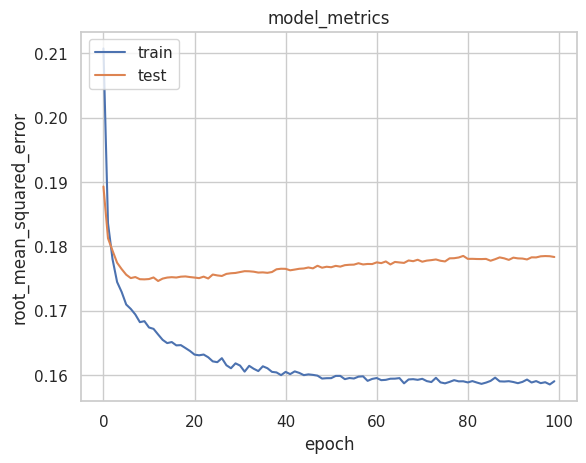

In [59]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- **`movie_df`** adalah dataframe berisi seluruh daftar movie.
- **`df`** adalah dataframe berisi data rating user terhadap movie.

Langkah-langkah:
1. Mengambil **satu user secara acak** dari dataset `rating_final.csv`.
2. Menentukan daftar **movie yang sudah dikunjungi** (diberi rating) oleh user tersebut.
3. Menggunakan operator **bitwise (~)** untuk memilih **movie yang belum dikunjungi**.
4. Melakukan **encoding** pada daftar movie yang belum dikunjungi.
5. Menyiapkan array **user_movie_array** untuk prediksi rating terhadap semua movie yang belum dikunjungi user.

Output: Data siap untuk digunakan dalam **prediksi rekomendasi** menggunakan model!



In [60]:
#Mendapatkan Rekomendasi Movie
movie_df = movie_new
df = pd.read_csv('rating_final.csv')

# Mengambil sample user
user_id = df.userId.sample(1).iloc[0]
movie_visited_by_user = df[df.userId == user_id]

# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html
movie_not_visited = movie_df[~movie_df['id'].isin(movie_visited_by_user.userId.values)]['id']
resto_not_visited = list(
    set(movie_not_visited)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_visited = [[movie_to_movie_encoded.get(x)] for x in movie_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_visited), movie_not_visited)
)

Prediksi dan Menampilkan Rekomendasi Movie

- **`ratings`**: Model memprediksi skor rating untuk setiap movie yang belum dikunjungi user.
- **`top_ratings_indices`**: Mengambil indeks 10 movie dengan prediksi skor tertinggi.
- **`recommended_movie_ids`**: Mengubah indeks movie hasil prediksi menjadi movieId asli.

Langkah-langkah:
1. **Prediksi** rating movie yang belum dikunjungi.
2. **Ambil** 10 movie dengan rating tertinggi sebagai rekomendasi.
3. **Tampilkan**:
   - 5 movie favorit yang pernah dirating tinggi oleh user.
   - 10 rekomendasi movie terbaik untuk user berdasarkan prediksi model.
Hasil: Daftar rekomendasi movie yang dipersonalisasi untuk setiap user!



In [61]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Movie with high ratings from user')
print('----' * 8)

top_movie_user = (
    movie_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.title, ':', row.genres)

print('----' * 8)
print('Top 10 movie recommendation')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.title, ':', row.genres)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Showing recommendations for users: 66
Movie with high ratings from user
--------------------------------
Dead Poets Society (1989) : Drama
Spirited Away (Sen to Chihiro no kamikakushi) (2001) : Adventure|Animation|Fantasy
--------------------------------
Top 10 movie recommendation
--------------------------------
Heavy Metal (1981) : Action|Adventure|Animation|Horror|Sci-Fi
Singin' in the Rain (1952) : Comedy|Musical|Romance
Dead Alive (Braindead) (1992) : Comedy|Fantasy|Horror
Rosencrantz and Guildenstern Are Dead (1990) : Comedy|Drama
Real Genius (1985) : Comedy
400 Blows, The (Les quatre cents coups) (1959) : Crime|Drama
Monty Python's And Now for Something Completely Different (1971) : Comedy
Baraka (1992) : Documentary
Suspiria (1977) : Horror
Brotherhood of the Wolf (Pacte des loups, Le) (2001) : Action|Mystery|Thriller


Output Rekomendasi Movie untuk User

- **Model** berhasil memprediksi rekomendasi movie untuk 1 user acak dari dataset (`userId = 66`).
- **Bagian pertama** menampilkan 5 movie terbaik yang sebelumnya sudah dirating tinggi oleh user.
- **Bagian kedua** menampilkan 10 movie baru yang direkomendasikan oleh model berdasarkan prediksi skor tertinggi.

Penjelasan Output:
- **"Movie with high ratings from user"**:
  - Daftar film favorit user berdasarkan data historis rating yang tinggi.
- **"Top 10 movie recommendation"**:
  - Daftar film baru yang belum pernah ditonton user, tetapi diprediksi akan disukai berdasarkan hasil training model.

Ini membuktikan bahwa model rekomendasi dapat menghasilkan prediksi personalisasi berdasarkan histori user!

